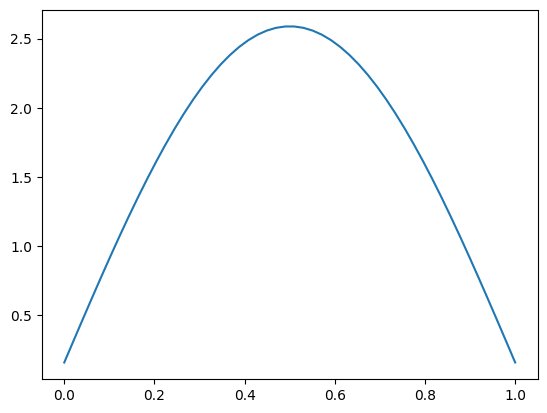

In [22]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

N = 50 # Количество узлов в сетке
x = np.linspace(0, 1, N)

k = 0.01
u0 = np.sin(np.pi * x)

diagonals = np.zeros((3, N)) # Создаем матрицу с тремя диагоналями
diagonals[0,:] = -1
diagonals[1,:] = 2
diagonals[2,:] = -1
A = sparse.spdiags(diagonals, [-1,0,1], N, N, format="csr") # Создаем разреженную матрицу

for i in range(1): # 100 временных шагов
    b = k * u0
    u = spsolve(A, b) # Решаем систему уравнений
    plt.plot(x, u) # Визуализируем результат
    u0 = u
plt.show()

<class 'int'>


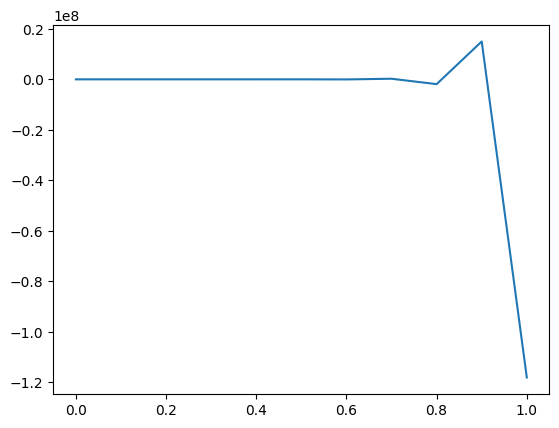

In [40]:
import numpy as np
import matplotlib.pyplot as plt
 
'''# Параметры системы
R = 1.0  # Сопротивление
L = 2.0  # Самоиндукция
G = 0.5  # Ток утечки
C = 0.8  # Емкость единицы длины провода'''
 
# Границы расчетной области
x_start = 0.0
x_end = 1.0
#t_start = 0.0
#t_end = 1.0
 
# Шаги по координате и времени
dx = 0.1
#dt = 0.01
 
# Создание сетки
x_grid = np.arange(x_start, x_end + dx, dx)
#t_grid = np.arange(t_start, t_end + dt, dt)
num_x = len(x_grid)
#num_t = len(t_grid)
 
# Инициализация массивов для хранения значений u и i

psy = np.zeros(num_x)
dot_psy = np.zeros(num_x)
print(type(num_x))

# Установка начальных и граничных условий
psy[1] = 1.0  # Начальное условие для u
dot_psy = 1.0  # Начальное условие для i
psy[0] = 0.0  # Граничное условие u при x = x_start
dot_psy = 0.0  # Граничное условие u при x = x_end
psy[num_x-1] = 0.0  # Граничное условие i при x = x_start
dot_psy = 0.0  # Граничное условие i при x = x_end
 
# Явная схема конечных разностей
E = 10
for j in range(1, num_x - 1):
    psy[j+1] = 2*psy[j] - psy[j-1] - psy[j]*E
 
# Построение графиков
'''X, T = np.meshgrid(x_grid, t_grid)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.title('Solution for u(x, t)')
plt.show()
 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, i, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('i')
plt.title('Solution for i(x, t)')
plt.show()'''
plt.plot(x_grid, psy)
plt.show()
 
 
